### Importing the necessary Libraries

In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading and checking the data set

In [4]:
GBYT_df = pd.read_excel('GBvideos.xlsx')
GBYT_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â€_Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â€_Ready f...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [82]:
GBYT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                38569 non-null  object
 1   trending_date           38916 non-null  object
 2   title                   38916 non-null  object
 3   channel_title           38915 non-null  object
 4   category_id             38916 non-null  int64 
 5   publish_time            38916 non-null  object
 6   tags                    38916 non-null  object
 7   views                   38916 non-null  int64 
 8   likes                   38916 non-null  int64 
 9   dislikes                38916 non-null  int64 
 10  comment_count           38916 non-null  int64 
 11  thumbnail_link          38916 non-null  object
 12  comments_disabled       38916 non-null  bool  
 13  ratings_disabled        38916 non-null  bool  
 14  video_error_or_removed  38916 non-null  bool  
 15  de

In [83]:
GBYT_df.describe()

,category_id,views,likes,dislikes,comment_count
count,38916.000000,3.891600e+04,3.891600e+04,3.891600e+04,3.891600e+04
mean,16.827937,5.911944e+06,1.345196e+05,7.612560e+03,1.308835e+04
std,7.752728,1.900121e+07,3.499893e+05,5.095683e+04,5.066740e+04
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,2.515272e+05,5.897000e+03,2.000000e+02,6.790000e+02
50%,20.000000,9.818890e+05,2.518250e+04,8.210000e+02,2.478000e+03
75%,24.000000,3.683628e+06,1.140892e+05,3.357500e+03,9.241500e+03
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


### Cleaning the 'publish_time' column 

#### transforming it into a datetime64 dtype

In [5]:
GBYT_df['publish_time'] = pd.to_datetime(GBYT_df['publish_time'])
GBYT_df['publish_time']

0       2017-11-10 07:38:29+00:00
1       2017-11-12 06:24:44+00:00
2       2017-11-10 17:00:03+00:00
3       2017-11-13 02:30:38+00:00
4       2017-11-13 01:45:13+00:00
                   ...           
38911   2018-05-09 07:00:01+00:00
38912   2018-05-11 17:09:16+00:00
38913   2018-05-08 11:05:08+00:00
38914   2018-05-08 20:32:32+00:00
38915   2018-05-11 04:06:35+00:00
Name: publish_time, Length: 38916, dtype: datetime64[ns, UTC]

#### separating time and date into two different columns

In [6]:
GBYT_df['publish_date'] = GBYT_df['publish_time'].dt.date
GBYT_df['publish_date'].head()

0    2017-11-10
1    2017-11-12
2    2017-11-10
3    2017-11-13
4    2017-11-13
Name: publish_date, dtype: object

In [7]:
GBYT_df['time_published'] = GBYT_df['publish_time'].dt.time
GBYT_df['time_published'].head()

0    07:38:29
1    06:24:44
2    17:00:03
3    02:30:38
4    01:45:13
Name: time_published, dtype: object

In [88]:
GBYT_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,time_published,publish_date
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10 07:38:29+00:00,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,07:38:29,2017-11-10
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â€_Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â€_Ready f...,06:24:44,2017-11-12
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,17:00:03,2017-11-10
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13 02:30:38+00:00,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,02:30:38,2017-11-13
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13+00:00,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,01:45:13,2017-11-13


### Dropping unwanted columns and reordering the ones kept

In [8]:
GBYT_df2 = GBYT_df.drop(['publish_time'], axis = 1)
GBYT_df2.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,time_published
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,2017-11-10,07:38:29
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â€_Ready for It? (Live) - SNL,Saturday Night Live,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â€_Ready f...,2017-11-12,06:24:44
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,2017-11-10,17:00:03
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,2017-11-13,02:30:38
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,2017-11-13,01:45:13


#### reordering the columns

In [9]:
GBYT_df3 = GBYT_df2[['video_id','trending_date','title','channel_title','publish_date','time_published'
         ,'category_id','tags','views','likes','dislikes','comment_count']]
GBYT_df3.head()

,video_id,trending_date,title,channel_title,publish_date,time_published,category_id,tags,views,likes,dislikes,comment_count
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,2017-11-10,07:38:29,26,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â€_Ready for It? (Live) - SNL,Saturday Night Live,2017-11-12,06:24:44,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10,17:00:03,10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,2017-11-13,02:30:38,17,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,2017-11-13,01:45:13,25,[none],9815,30,2,30


In [91]:
GBYT_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        38569 non-null  object
 1   trending_date   38916 non-null  object
 2   title           38916 non-null  object
 3   channel_title   38915 non-null  object
 4   publish_date    38916 non-null  object
 5   time_published  38916 non-null  object
 6   category_id     38916 non-null  int64 
 7   tags            38916 non-null  object
 8   views           38916 non-null  int64 
 9   likes           38916 non-null  int64 
 10  dislikes        38916 non-null  int64 
 11  comment_count   38916 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 3.6+ MB


### Dropping duplicates for 'video_id' column

In [10]:
GBYT_df3.value_counts(['video_id'])

video_id   
BhIEIO0vaBE    38
2z3EUY1aXdY    38
NooW_RbfdWI    38
u_C4onVrr8U    38
Il-an3K9pjg    38
               ..
w9JQf4Lw46g     1
EXZmln6LY6k     1
pVgx8pYpwRE     1
pV5r-dlSD1A     1
8z_cg5CypRc     1
Length: 3236, dtype: int64

In [11]:
GBYT_df4 = GBYT_df3.drop_duplicates(['video_id'])
GBYT_df4.head()

,video_id,trending_date,title,channel_title,publish_date,time_published,category_id,tags,views,likes,dislikes,comment_count
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,2017-11-10,07:38:29,26,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â€_Ready for It? (Live) - SNL,Saturday Night Live,2017-11-12,06:24:44,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10,17:00:03,10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,2017-11-13,02:30:38,17,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,2017-11-13,01:45:13,25,[none],9815,30,2,30


In [11]:
GBYT_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3237 entries, 0 to 38887
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        3236 non-null   object
 1   trending_date   3237 non-null   object
 2   title           3237 non-null   object
 3   channel_title   3236 non-null   object
 4   publish_date    3237 non-null   object
 5   time_published  3237 non-null   object
 6   category_id     3237 non-null   int64 
 7   tags            3237 non-null   object
 8   views           3237 non-null   int64 
 9   likes           3237 non-null   int64 
 10  dislikes        3237 non-null   int64 
 11  comment_count   3237 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 328.8+ KB


In [123]:
GBYT_df4

,video_id,trending_date,title,channel_title,publish_date,time_published,category_id,tags,views,likes,dislikes,comment_count
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,2017-11-10,07:38:29,26,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â€_Ready for It? (Live) - SNL,Saturday Night Live,2017-11-12,06:24:44,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10,17:00:03,10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,2017-11-13,02:30:38,17,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,2017-11-13,01:45:13,25,[none],9815,30,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...
38763,YQJmvXamKYg,18.14.06,Conway: People are bending to the will of Pres...,Fox News,2018-06-13,12:56:49,25,"Fox News Channel|""FNC""|""Fox News""|""News""|""Late...",99048,2231,151,1294
38767,i63jWjoAWHE,18.14.06,_¡_µ__Ñ‘__ _¡_»_µ_¿_°_º____: ___»Ã©-___»Ã©-___...,_¡_µ___µ__ _¡_»_µ_¿_°_º____,2018-06-11,17:13:08,23,"_¡_µ___µ__ _¡_»_µ_¿_°_º____|""___¸Ñ‚_°Ñ€_°""|""_±...",6597033,301185,14448,16505
38782,V15BYnSr0P8,18.14.06,Live It Up (Official Video) - Nicky Jam feat. ...,NickyJamTV,2018-06-08,11:58:38,10,"Nicky Jam|""NickyJamPR""|""latin""|""will smith""|""E...",20409647,568680,44854,64390
38793,BOhylL90UVQ,18.14.06,The Chainsmokers - Somebody ft. Drew Love (Ror...,The Chainsmokers,2018-06-09,16:00:00,10,"The Chainsmokers Somebody|""Chainsmokers Somebo...",402345,32126,427,1895


### Importing ID and categories data set

In [12]:
GBYT_ID = pd.read_excel('GB_category_id.xlsx')
GBYT_ID.head()

,ID Number,Category
0,1.0,Film & Animation
1,2.0,Autos & Vehicles
2,10.0,Music
3,15.0,Pets & Animals
4,17.0,Sports


In [13]:
GBYT_ID['ID Number'] = pd.read_excel('GB_category_id.xlsx')['ID Number'].convert_dtypes(convert_integer = True)

In [14]:
GBYT_ID.head()

,ID Number,Category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


### Joining the two data sets to find the respective category for each ID number

In [15]:
GBYT_df5 = GBYT_df4.join(GBYT_ID.set_index('ID Number'), on = 'category_id', how = 'left')
GBYT_df5.head()

,video_id,trending_date,title,channel_title,publish_date,time_published,category_id,tags,views,likes,dislikes,comment_count,Category
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,2017-11-10,07:38:29,26,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â€_Ready for It? (Live) - SNL,Saturday Night Live,2017-11-12,06:24:44,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10,17:00:03,10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,Music
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,2017-11-13,02:30:38,17,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,Sports
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,2017-11-13,01:45:13,25,[none],9815,30,2,30,News & Politics


In [16]:
GBYT_df6 = GBYT_df5[['video_id', 'trending_date', 'title', 'channel_title', 
                     'publish_date','time_published','category_id','Category', 
                     'tags', 'views', 'likes','dislikes','comment_count']]
GBYT_df6

,video_id,trending_date,title,channel_title,publish_date,time_published,category_id,Category,tags,views,likes,dislikes,comment_count
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,2017-11-10,07:38:29,26,Howto & Style,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â€_Ready for It? (Live) - SNL,Saturday Night Live,2017-11-12,06:24:44,24,Entertainment,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10,17:00:03,10,Music,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,2017-11-13,02:30:38,17,Sports,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,2017-11-13,01:45:13,25,News & Politics,[none],9815,30,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38763,YQJmvXamKYg,18.14.06,Conway: People are bending to the will of Pres...,Fox News,2018-06-13,12:56:49,25,News & Politics,"Fox News Channel|""FNC""|""Fox News""|""News""|""Late...",99048,2231,151,1294
38767,i63jWjoAWHE,18.14.06,_¡_µ__Ñ‘__ _¡_»_µ_¿_°_º____: ___»Ã©-___»Ã©-___...,_¡_µ___µ__ _¡_»_µ_¿_°_º____,2018-06-11,17:13:08,23,Comedy,"_¡_µ___µ__ _¡_»_µ_¿_°_º____|""___¸Ñ‚_°Ñ€_°""|""_±...",6597033,301185,14448,16505
38782,V15BYnSr0P8,18.14.06,Live It Up (Official Video) - Nicky Jam feat. ...,NickyJamTV,2018-06-08,11:58:38,10,Music,"Nicky Jam|""NickyJamPR""|""latin""|""will smith""|""E...",20409647,568680,44854,64390
38793,BOhylL90UVQ,18.14.06,The Chainsmokers - Somebody ft. Drew Love (Ror...,The Chainsmokers,2018-06-09,16:00:00,10,Music,"The Chainsmokers Somebody|""Chainsmokers Somebo...",402345,32126,427,1895


In [17]:
GBYT_df6.rename({'Category':'category'}, axis = 1, inplace = True)
GBYT_df6.head()

,video_id,trending_date,title,channel_title,publish_date,time_published,category_id,category,tags,views,likes,dislikes,comment_count
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,2017-11-10,07:38:29,26,Howto & Style,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â€_Ready for It? (Live) - SNL,Saturday Night Live,2017-11-12,06:24:44,24,Entertainment,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10,17:00:03,10,Music,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,2017-11-13,02:30:38,17,Sports,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,2017-11-13,01:45:13,25,News & Politics,[none],9815,30,2,30


### Checking which category has the highest count (frequency)

/Users/giacomo/opt/anaconda3/envs/labs/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/giacomo/opt/anaconda3/envs/labs/lib/python3.8/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


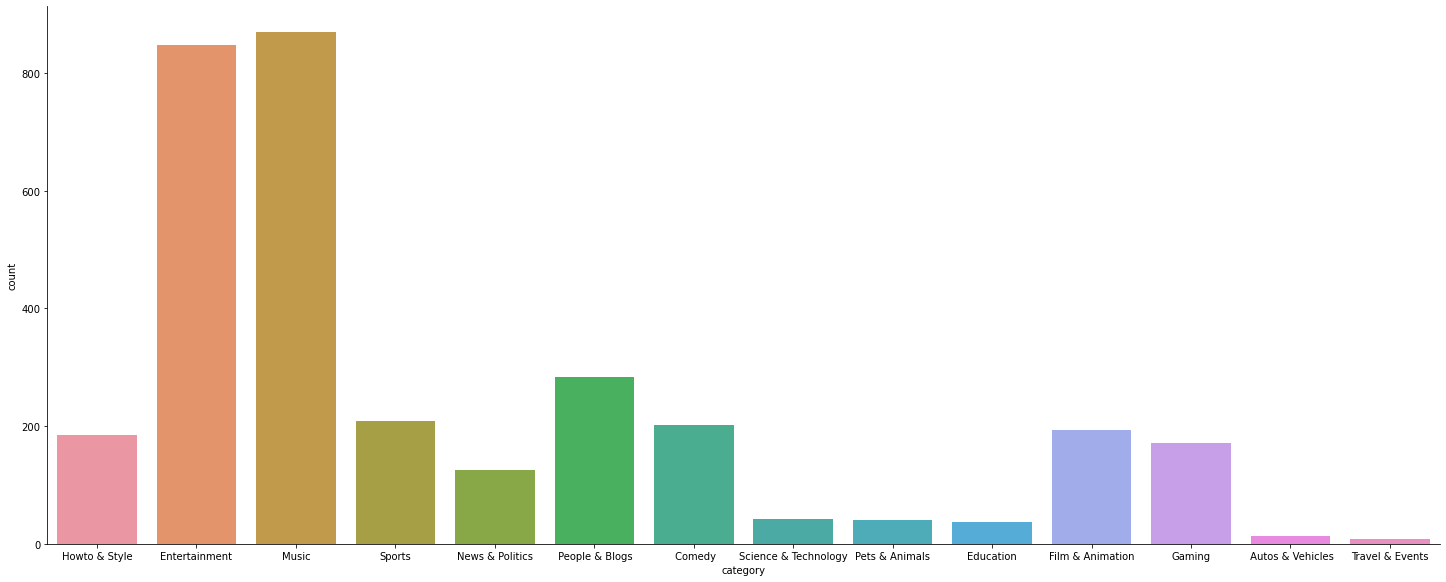

In [18]:
sns.factorplot(x = 'category', data = GBYT_df6, kind = 'count', size=8, aspect=2.5)

### Top 20 channels and categories with highest number of views

In [19]:
GBYT_df6[['channel_title', 'views','category']].groupby(['channel_title','category']
        ).sum().sort_values('views', ascending = False).head(20)

,,views
channel_title,category,
LuisFonsiVEVO,Music,143408235
ibighit,Music,103235984
BeckyGVEVO,Music,88568646
Marvel Entertainment,Entertainment,83889703
jypentertainment,Music,77387297
SebastianYatraVEVO,Music,72513020
Ozuna,Music,70032836
NickyJamTV,Music,55769726
WWE,Sports,54294630


In [192]:
df_views = GBYT_df6[['channel_title', 'views','category']].groupby(['channel_title','category']
        ).sum().sort_values('views', ascending = False).head(20)

### Top 20 channels and categories with highest number of likes 

In [20]:
GBYT_df6[['channel_title', 'likes', 'category']].groupby(['channel_title','category']).sum().sort_values(
         'likes', ascending = False).head(20)

,,likes
channel_title,category,
ibighit,Music,16435002
SMTOWN,Music,7175435
jypentertainment,Music,3978472
Marvel Entertainment,Entertainment,3697972
Logan Paul Vlogs,Entertainment,3368025
Ed Sheeran,Music,2842081
LuisFonsiVEVO,Music,2686169
EminemVEVO,Music,2441886
TaylorSwiftVEVO,Music,2319352


### Top 20 channels and categories with highest number of comments count

In [21]:
GBYT_df6[['channel_title', 'comment_count', 'category']].groupby(['channel_title','category']
         ).sum().sort_values('comment_count', ascending = False).head(20)

,,comment_count
channel_title,category,
ibighit,Music,2420272
Logan Paul Vlogs,Entertainment,1402855
SMTOWN,Music,712070
jypentertainment,Music,559848
YouTube Spotlight,Entertainment,467106
Marvel Entertainment,Entertainment,463552
EminemVEVO,Music,322556
PewDiePie,Entertainment,282262
Lucas Lucco,Music,237473


### Top 20 channels with highest number of dislikes

In [27]:
GBYT_df6[['channel_title', 'category', 'dislikes']].groupby(['channel_title', 'category']).sum().sort_values(
         'dislikes', ascending = False).head(20)

,,dislikes
channel_title,category,
Logan Paul Vlogs,Entertainment,1015129
YouTube Spotlight,Entertainment,485905
Lucas Lucco,Music,295766
jypentertainment,Music,181052
ibighit,Music,153242
Daily Caller,People & Blogs,140077
LuisFonsiVEVO,Music,137938
PewDiePie,Entertainment,106891
EminemVEVO,Music,105117


### Fixing 'publish_date' dtype

In [151]:
GBYT_df6['publish_date'] = pd.to_datetime(GBYT_df6['publish_date'])

In [156]:
GBYT_df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3237 entries, 0 to 38887
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   video_id        3236 non-null   object        
 1   trending_date   3237 non-null   object        
 2   title           3237 non-null   object        
 3   channel_title   3236 non-null   object        
 4   publish_date    3237 non-null   datetime64[ns]
 5   time_published  3237 non-null   object        
 6   category_id     3237 non-null   object        
 7   category        3231 non-null   object        
 8   tags            3237 non-null   object        
 9   views           3237 non-null   int64         
 10  likes           3237 non-null   int64         
 11  dislikes        3237 non-null   int64         
 12  comment_count   3237 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 483.1+ KB


### Exporting the current data set

I have noticed that from the years 2008 to 2017 (included) the metrics (views, likes, comments etc...) are very poor, therefore I have decided to temporarily get rid of those years from the dataset, in order to better analyze the latest trends and patterns of the data.

In [132]:
GBYT_df6.to_excel('GBYT_df6.xlsx',sheet_name='Sheet1')

Here I have proceeded with altering the data set on Excel and I am importing back the modified data set which does not contain the years 2008 - 2017.

In [176]:
GBYT_df7 = pd.read_excel('GBYT_df6.xlsx', '2018')
GBYT_df7.head()

,Unnamed: 0,video_id,trending_date,title,channel_title,publish_date,time_published,category_id,category,tags,views,likes,dislikes,comment_count
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping the NaN values which are the records of the years I have temporarly removed from this data set ( I have saved them on an additional Sheet)

In [179]:
GBYT_df7.dropna(inplace = True)

In [181]:
GBYT_df7.head()

,Unnamed: 0,video_id,trending_date,title,channel_title,publish_date,time_published,category_id,category,tags,views,likes,dislikes,comment_count
2126,20177.0,YFHHGETsxkE,18.25.02,"PAPERS, PLEASE - The Short Film (2018) 4K SUBS",_ù_¸_º_¸Ñ‚_° __Ñ€_´Ñ‹__ÑÅ_º_¸__,2018-02-24,15:59:25,1.0,Film & Animation,"_º_¸____|""_º__Ñ€__Ñ‚_º_¸__ ___µÑ‚Ñ€""|""_º__Ñ€__...",282380.0,35093.0,303.0,1944.0
2127,20180.0,Ob48twC1yf8,18.25.02,Parkland Shooting Survivors on the 'March for ...,TheEllenShow,2018-02-23,14:01:11,24.0,Entertainment,"Ellen|""degeneres""|""ellen degeneres""|""the ellen...",799234.0,22727.0,6831.0,0.0
2128,20187.0,4AtOU0dDXv8,18.25.02,Shooting survivor confronts NRA spokesperson D...,CNN,2018-02-22,04:50:21,25.0,News & Politics,"latest News|""Happening Now""|""CNN""|""parkland to...",2446626.0,34294.0,17151.0,45043.0
2129,20195.0,6uJemANlDqQ,18.25.02,HIGHLIGHTERS FOR PALE SKIN | JOHN MACLEAN,John Maclean,2018-02-24,15:28:21,26.0,Howto & Style,"JOHN MACLEAN|""HIGHLIGHTER FOR PALE SKIN""|""HIGH...",15154.0,1287.0,13.0,267.0
2130,20196.0,OTu9N40E_MI,18.25.02,BEST F(R)IENDS | Official Trailer [HD] (2018) ...,Best F(r)iends,2018-02-23,18:00:38,1.0,Film & Animation,"Tommy Wiseau|""Greg Sestero""|""The Room""|""The Di...",73462.0,0.0,0.0,156.0


### Distribution of the count of categories throughout time

<AxesSubplot:xlabel='publish_date', ylabel='Count'>

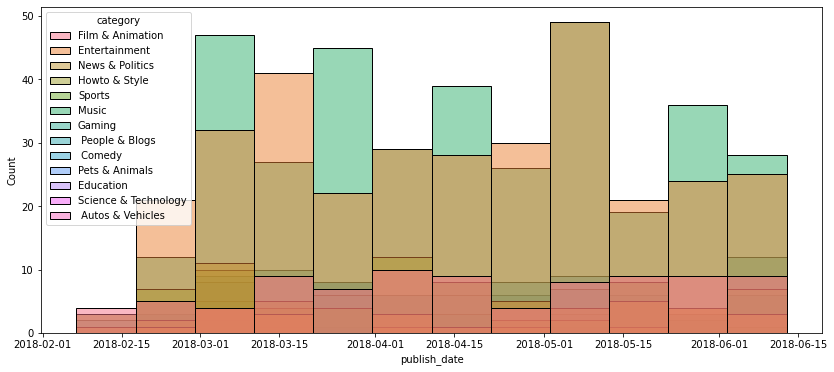

In [226]:
fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data = GBYT_df7, x = 'publish_date', hue = 'category', ax=ax)

### Likes throughout time 

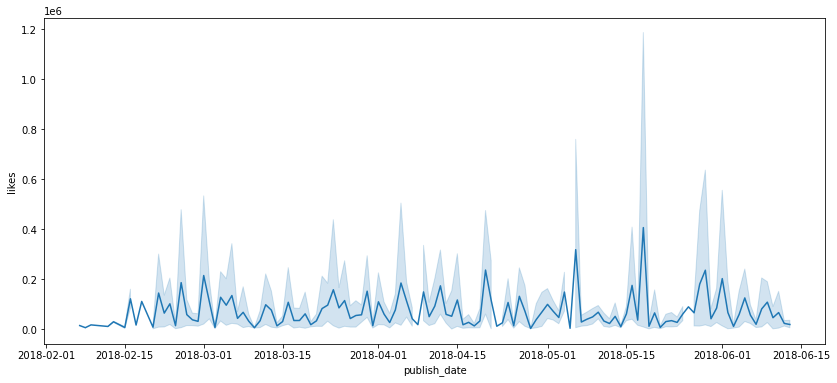

In [212]:
fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)

likes_lineplot = sns.lineplot(data = GBYT_df7, x = 'publish_date', y = 'likes', ax = ax)

#### by category

<AxesSubplot:xlabel='publish_date', ylabel='likes'>

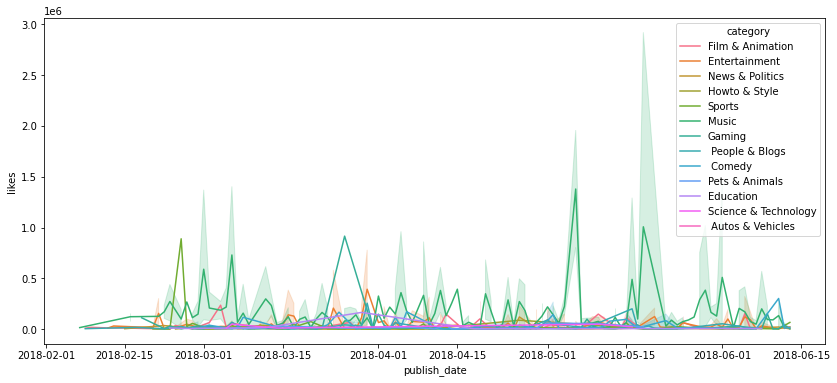

In [215]:
fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data = GBYT_df7, x = 'publish_date', y = 'likes', hue = 'category', ax = ax)



### Views throughout time

<AxesSubplot:xlabel='publish_date', ylabel='views'>

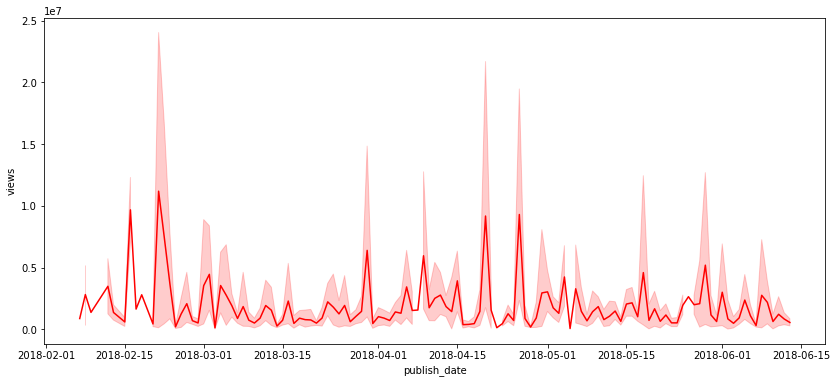

In [201]:
fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data = GBYT_df7, x = 'publish_date', y = 'views', ax = ax, color = 'red')

#### by category

<AxesSubplot:xlabel='publish_date', ylabel='views'>

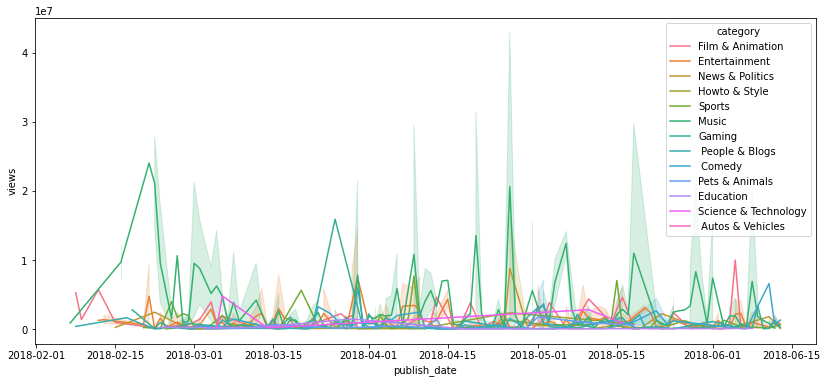

In [217]:
fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data = GBYT_df7, x = 'publish_date', y = 'views', hue = 'category', ax = ax)

### Comments throughout time

<AxesSubplot:xlabel='publish_date', ylabel='comment_count'>

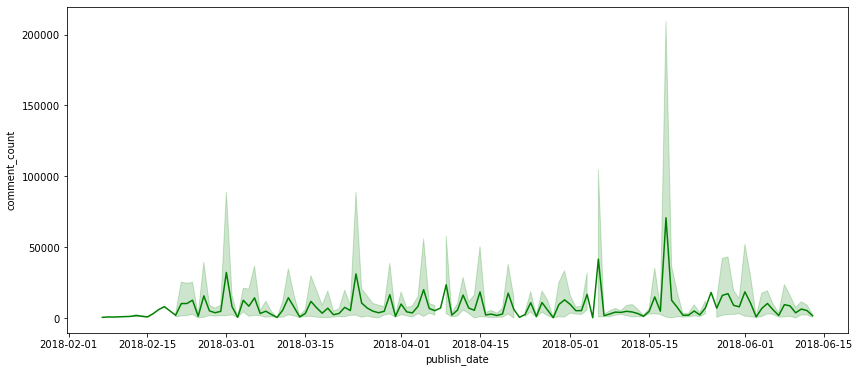

In [203]:
fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data = GBYT_df7, x = 'publish_date', y = 'comment_count', ax = ax, color = 'green')

#### by category

<AxesSubplot:xlabel='publish_date', ylabel='comment_count'>

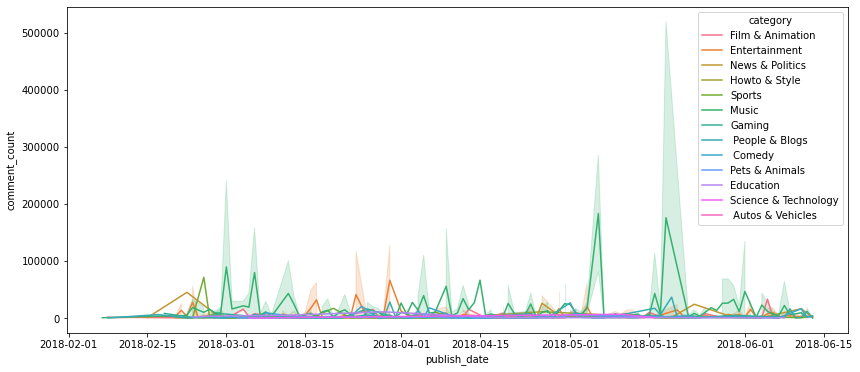

In [227]:
fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data = GBYT_df7, x = 'publish_date', y = 'comment_count', hue = 'category', ax = ax)

### Checking for correlation between views, likes, comment count in each category

In [257]:
vldcc_df = GBYT_df7[['views', 'likes', 'dislikes', 'comment_count', 'category']]
vldcc_df.head()

,views,likes,dislikes,comment_count,category
2126,282380.0,35093.0,303.0,1944.0,Film & Animation
2127,799234.0,22727.0,6831.0,0.0,Entertainment
2128,2446626.0,34294.0,17151.0,45043.0,News & Politics
2129,15154.0,1287.0,13.0,267.0,Howto & Style
2130,73462.0,0.0,0.0,156.0,Film & Animation


/Users/giacomo/opt/anaconda3/envs/labs/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giacomo/opt/anaconda3/envs/labs/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giacomo/opt/anaconda3/envs/labs/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giacomo/opt/anaconda3/envs/labs/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


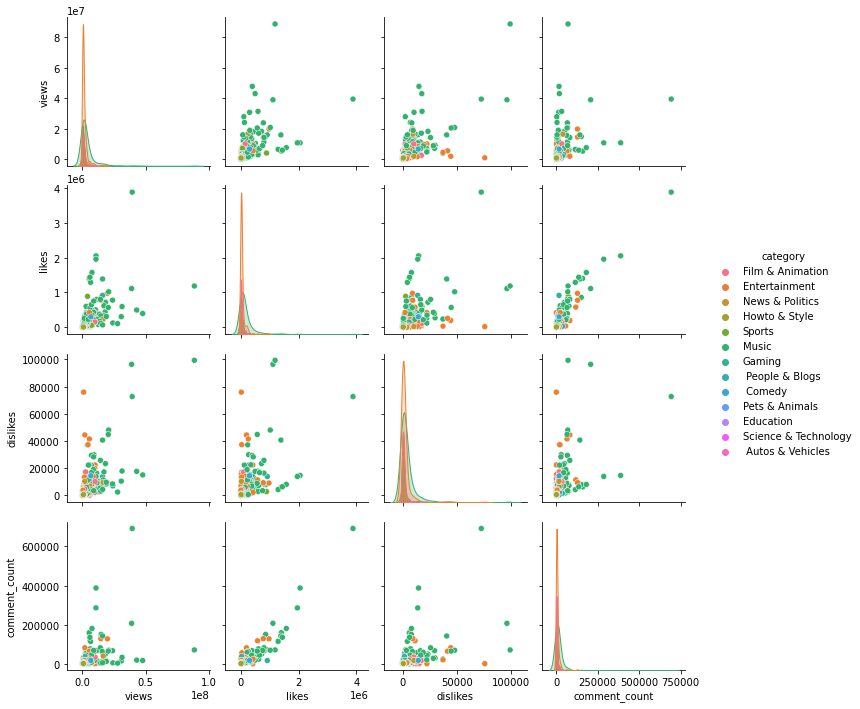

In [258]:
sns.pairplot(data = vldcc_df,hue ='category',diag_kind="kde")


### views and likes

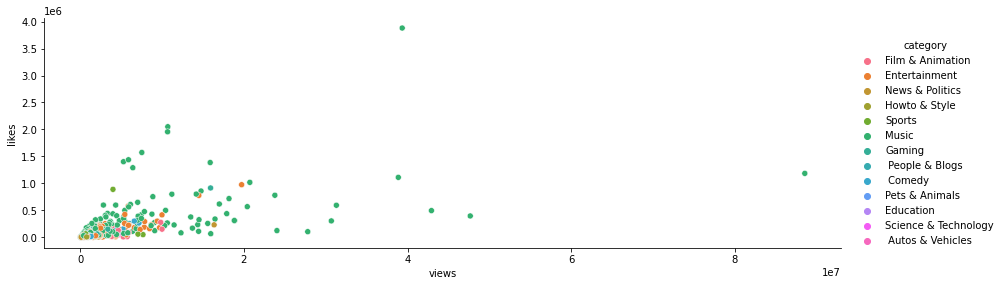

In [241]:
sns.pairplot(data = GBYT_df7, x_vars = 'views', y_vars = 'likes', kind = 'scatter', 
             hue = 'category',height = 4, aspect = 3)

### comment count and likes

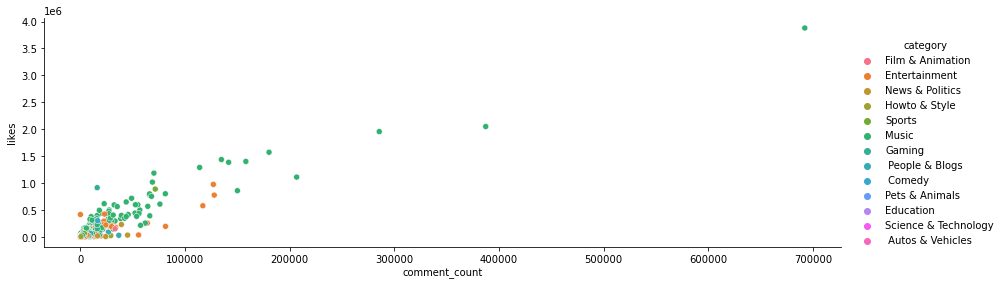

In [243]:
sns.pairplot(data = GBYT_df7, x_vars = 'comment_count', y_vars = 'likes', 
             hue = 'category', kind = 'scatter', height = 4, aspect = 3)

### comment_count and views

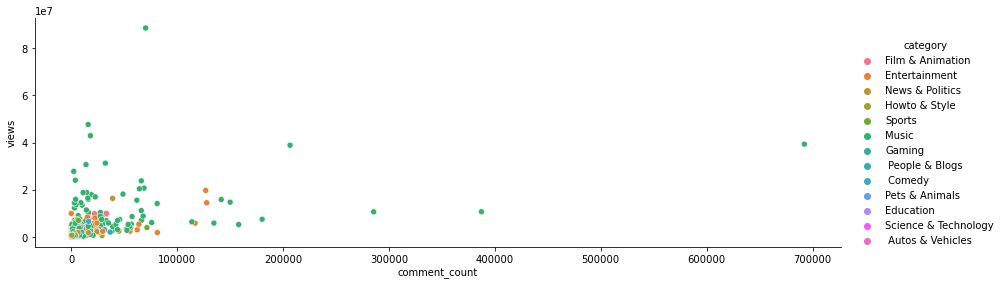

In [245]:
sns.pairplot(data = GBYT_df7, x_vars = 'comment_count', y_vars = 'views', 
             hue = 'category',kind = 'scatter', height = 4, aspect = 3)

#### It can be concluded that:

There is an overall strong relationship among all the metrics, with the comment_count and likes metrics having the strongest positive correlation.

### Remarks

The tags were analyzed on R Studio to find the most frequent used words.